### Script que criara os graficos a partir dos dados extraidos

Este script é responsável por criar gráficos a partir dos dados extraídos do banco de dados PostgreSQL. Inicialmente, ele estabelece uma conexão com o banco, utilizando a biblioteca psycopg2, e cria um cursor que permite a execução de comandos SQL.

O código irá executar consultas para extrair informações relevantes que serão armazenadas em um DataFrame da biblioteca pandas. Isso facilita a manipulação e visualização dos dados.

Após a extração, o script gerará diferentes tipos de gráficos usando a biblioteca matplotlib. Os gráficos podem incluir, por exemplo, gráficos de barras para mostrar o número total de discos por gênero, gráficos de linhas para ilustrar a evolução dos lançamentos ao longo dos anos e gráficos de pizza para representar a distribuição de discos por nacionalidade.

Por fim, após a criação dos gráficos, o script fechará o cursor e a conexão com o banco de dados para liberar os recursos utilizados.

In [ ]:
import psycopg2
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()

dbname = os.getenv('DB_NAME')
user = os.getenv('DB_USER')
password = os.getenv('DB_PASSWORD')
host = os.getenv('DB_HOST')
port = os.getenv('DB_PORT')

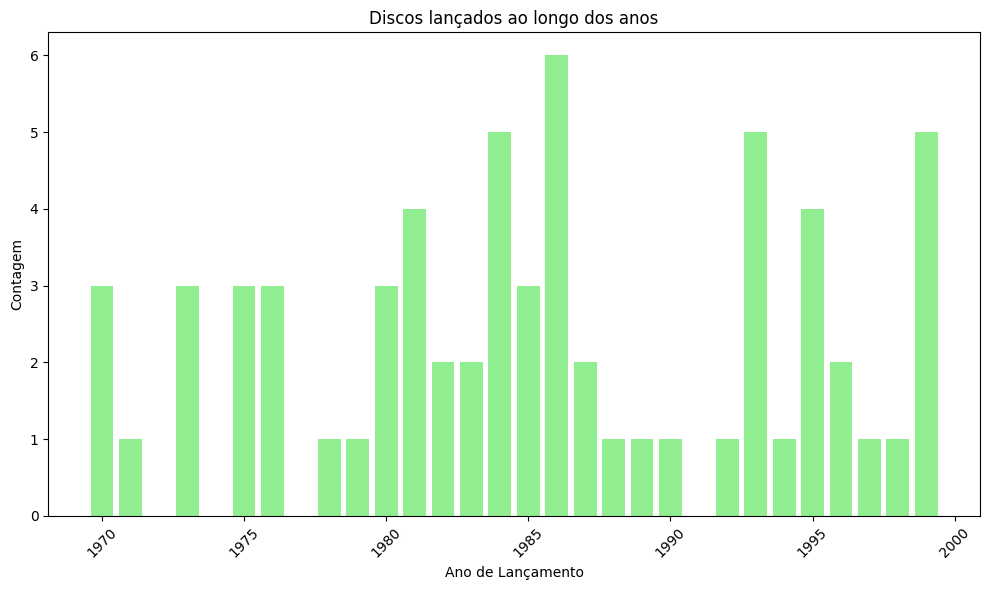

In [12]:
try:
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    cur.execute("SELECT nome, data_lancamento FROM discos")
    dados = cur.fetchall()

    df = pd.DataFrame(dados, columns=['Nome', 'Data de Lançamento'])
    df['Data de Lançamento'] = pd.to_datetime(df['Data de Lançamento'])

    df['Ano de Lançamento'] = df['Data de Lançamento'].dt.year
    ano_counts = df['Ano de Lançamento'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    plt.bar(ano_counts.index, ano_counts.values, color='lightgreen')
    plt.title('Discos lançados ao longo dos anos')
    plt.xlabel('Ano de Lançamento')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ocorreu um erro: {e}")

finally:
    if cur:
        cur.close()
    if conn:
        conn.close()


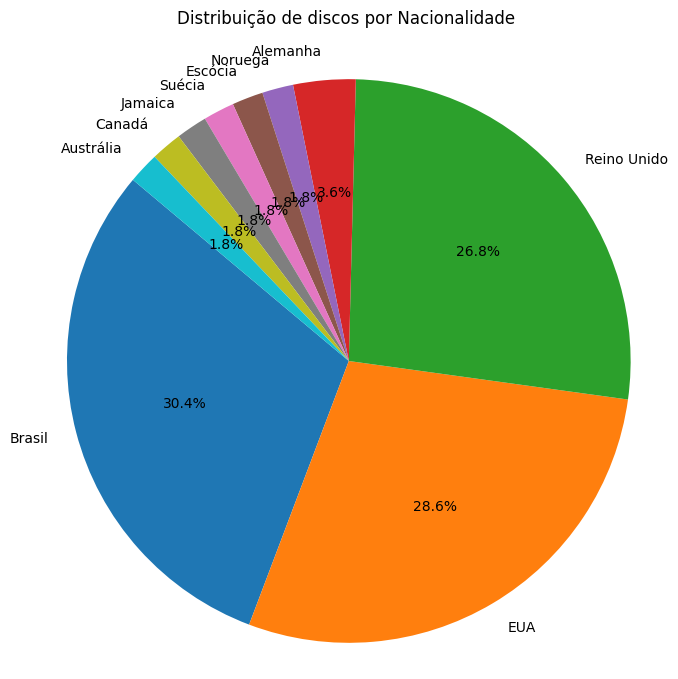

In [19]:
try:
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    cur.execute("SELECT nacionalidade FROM artistas")
    dados = cur.fetchall()

    nacionalidades = [linha[0] for linha in dados]
    df = pd.DataFrame(nacionalidades, columns=['Nacionalidade'])

    contagem_nacionalidade = df['Nacionalidade'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(contagem_nacionalidade, labels=contagem_nacionalidade.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribuição de discos por Nacionalidade \n')
    plt.axis('equal')
    plt.show()

except Exception as e:
    print(f"Ocorreu um erro: {e}")

finally:
    if cur:
        cur.close()
    if conn:
        conn.close()


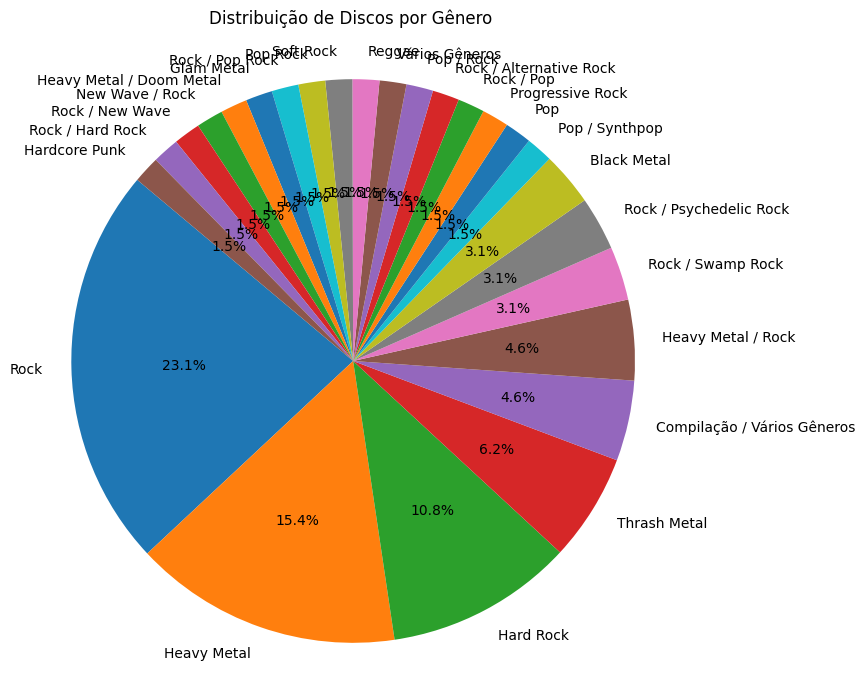

In [11]:
try:
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    cur.execute("""
        SELECT a.genero 
        FROM discos d 
        JOIN artistas a ON d.artista_id = a.artista_id
    """)
    dados = cur.fetchall()

    generos = [linha[0] for linha in dados]
    df = pd.DataFrame(generos, columns=['Gênero'])

    contagem_genero = df['Gênero'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(contagem_genero, labels=contagem_genero.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribuição de Discos por Gênero \n')
    plt.axis('equal')
    plt.show()

except Exception as e:
    print(f"Ocorreu um erro: {e}")

finally:
    if cur:
        cur.close()
    if conn:
        conn.close()

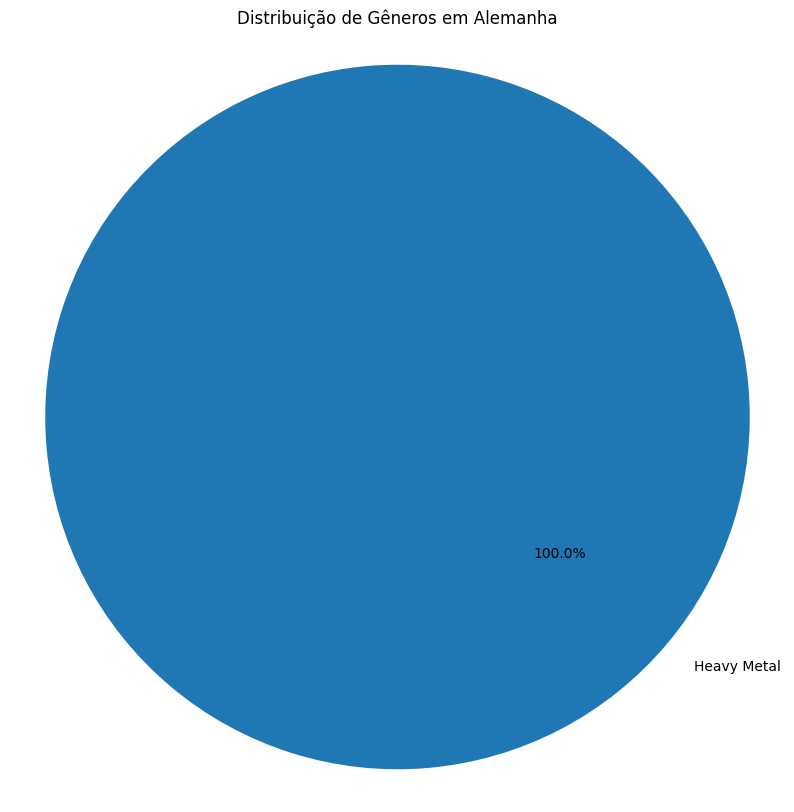

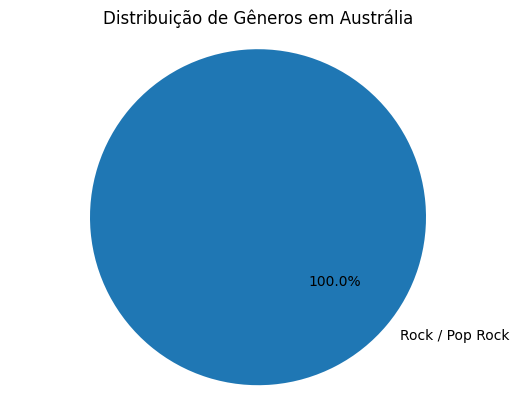

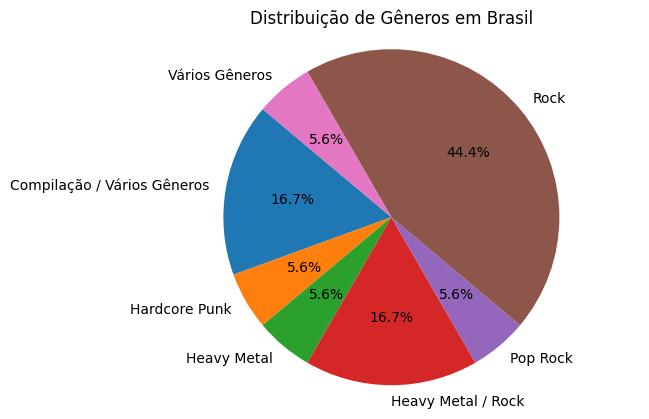

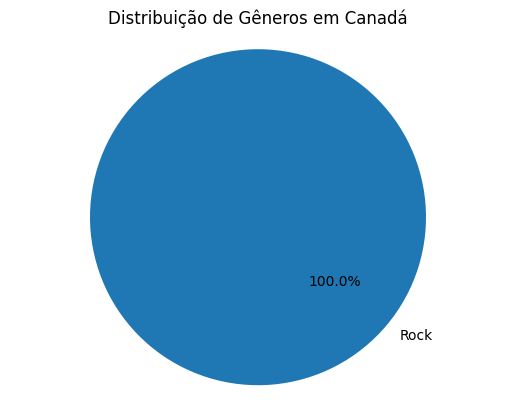

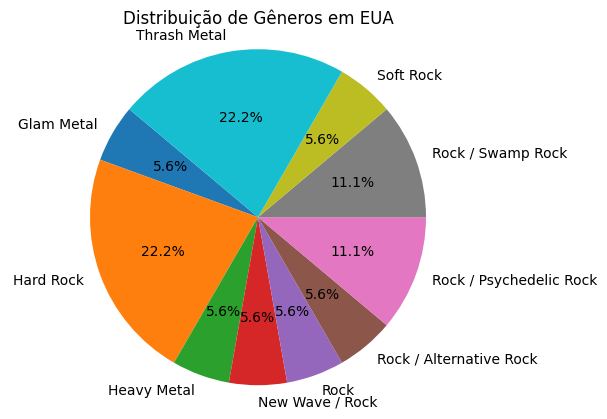

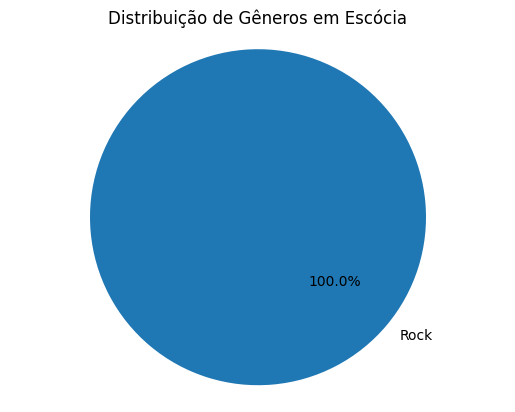

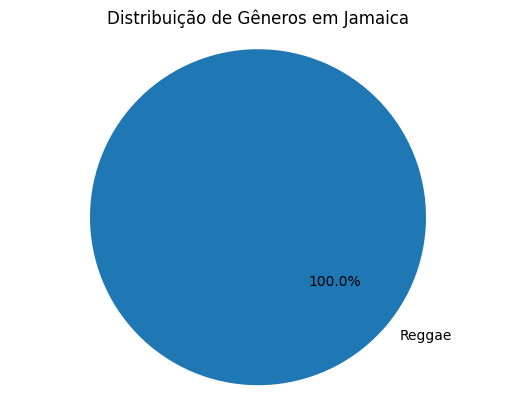

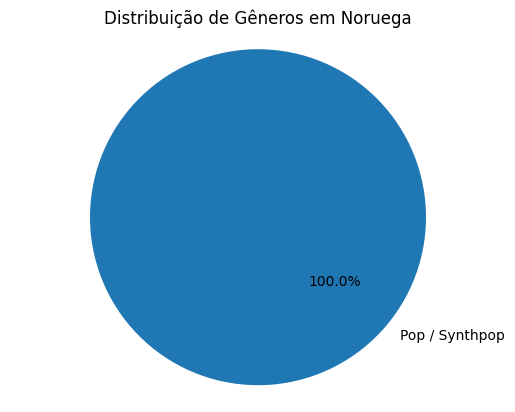

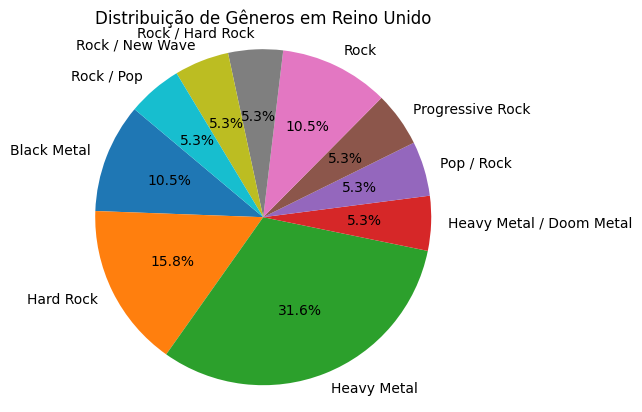

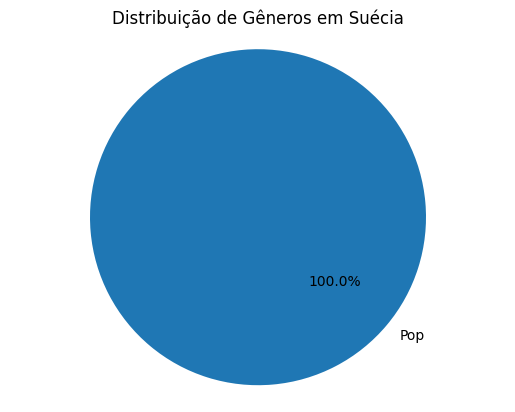

In [13]:
try:
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    cur.execute("""
        SELECT a.genero, a.nacionalidade 
        FROM discos d 
        JOIN artistas a ON d.artista_id = a.artista_id
    """)
    dados = cur.fetchall()

    df = pd.DataFrame(dados, columns=['Gênero', 'Nacionalidade'])

    contagem = df.groupby(['Nacionalidade', 'Gênero']).size().reset_index(name='Contagem')

    plt.figure(figsize=(10, 10))
    for nacionalidade in contagem['Nacionalidade'].unique():
        subset = contagem[contagem['Nacionalidade'] == nacionalidade]
        plt.pie(subset['Contagem'], labels=subset['Gênero'], autopct='%1.1f%%', startangle=140)

        plt.title(f'Distribuição de Gêneros em {nacionalidade}')
        plt.axis('equal')
        plt.show()

except Exception as e:
    print(f"Ocorreu um erro: {e}")

finally:
    if cur:
        cur.close()
    if conn:
        conn.close()